# Importing libraries and reading files

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

white = pd.read_csv('winequality-white.csv', sep = ';')
red = pd.read_csv('winequality-red.csv', sep = ';')

In [104]:
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
print(white.shape)
white.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Features with missing values

In [106]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [107]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Duplicated rows

In [108]:
red.duplicated().sum()

240

In [109]:
white.duplicated().sum()

937

# Unique values

In [110]:
red.quality.nunique()

6

In [111]:
white.quality.nunique()

7

# Mean density

In [112]:
red.density.mean()

0.9967466791744833

In [113]:
white.density.mean()

0.9940273764801896

# Appending Data

## Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.”

In [114]:
# create color array for red dataframe
color_red = np.repeat('red', red.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [115]:
red['color'] = color_red
white['color'] = color_white

## Combine DataFrames with Append

In [116]:
# append dataframes
wine_df = red.append(white)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# EDA with Visuals

### Histograms for Various Features

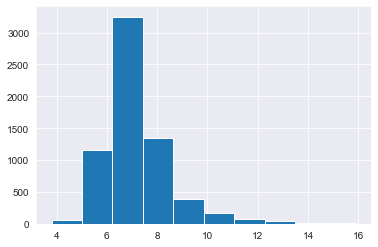

In [117]:
wine_df['fixed acidity'].hist();

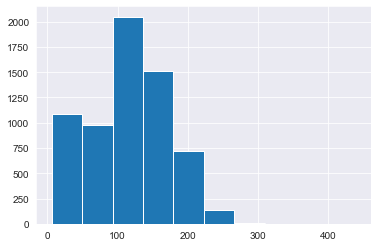

In [118]:
wine_df['total sulfur dioxide'].hist();

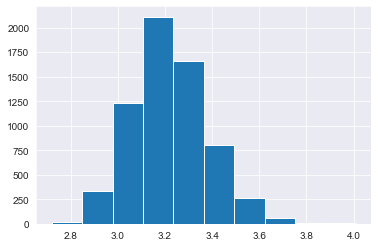

In [119]:
wine_df['pH'].hist();

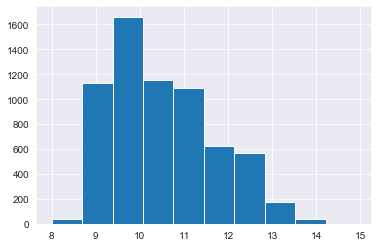

In [120]:
wine_df['alcohol'].hist();

### Scatterplots of Quality Against Various Features

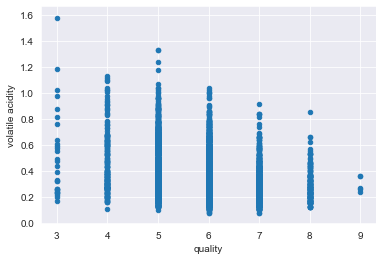

In [121]:
wine_df.plot(x = 'quality', y = 'volatile acidity', kind = 'scatter');

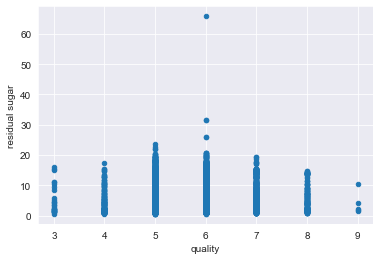

In [122]:
wine_df.plot(x = 'quality', y = 'residual sugar', kind = 'scatter');

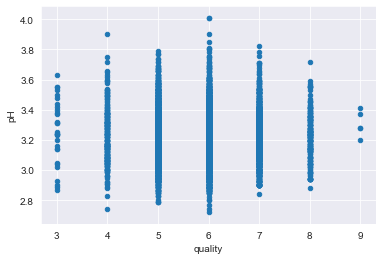

In [123]:
wine_df.plot(x = 'quality', y = 'pH', kind = 'scatter');

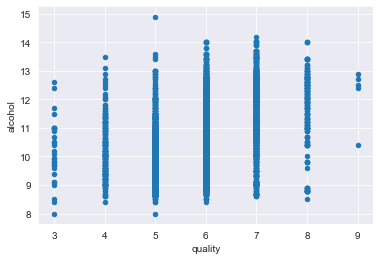

In [124]:
wine_df.plot(x = 'quality', y = 'alcohol', kind = 'scatter');

## Drawing Conclusions

### Is a certain type of wine (red or white) associated with higher quality?<br>
For this question, compare the average quality of red wine with the average quality of white wine with groupby. To do this group by color and then find the mean quality of each group.<br>

In [125]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby(['color'], as_index = False).mean()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
1,white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


### What level of acidity (pH value) receives the highest average rating?
This question is more tricky because unlike color, which has clear categories you can group by (red and white) pH is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. pandas' cut function let's you "cut" data in groups. Using this, create a new column called "acidity levels" with these categories:<br>
#### Acidity Levels:<br>
<b>High</b>: Lowest 25% of pH values <br>
<b>Moderately High</b>: 25% - 50% of pH values <br>
<b>Medium</b>: 50% - 75% of pH values <br>
<b>Low</b>: 75% - max pH value <br>

In [126]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe()['pH']

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [127]:
# Bin edges that will be used to "cut" the data into groups
# Fill in this list with five values you just found
bin_edges = [2.720000, 3.110000, 3.210000, 3.320000, 4.010000] 

In [128]:
# Labels for the four acidity level groups
# Name each acidity level category
bin_names = ['High', 'Moderately High', 'Medium', 'Low'] 

In [129]:
# Creates acidity_levels column
wine_df['acidity levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [130]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby(['acidity levels'], as_index = False).mean().quality

0    5.783343
1    5.784540
2    5.850832
3    5.859593
Name: quality, dtype: float64

### Do wines with higher alcoholic content receive better ratings?

In [131]:
# get the median amount of alcohol content
wine_df['alcohol'].median()

10.3

In [132]:
# select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [133]:
# get mean quality rating for the low alcohol and high alcohol groups
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

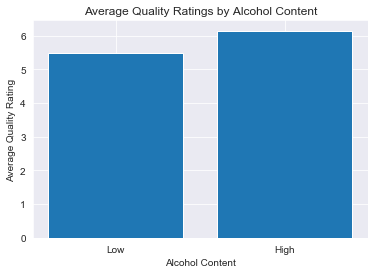

In [134]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### Do sweeter wines receive better ratings?

In [135]:
# get the median amount of residual sugar
wine_df['residual sugar'].median()

3.0

In [136]:
# select samples with residual sugar less than the median
low_sugar = wine_df[wine_df['residual sugar'] < 3.0]

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df[wine_df['residual sugar'] >= 3.0]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [137]:
# get mean quality rating for the low sugar and high sugar groups
mean_quality_low_sugar = low_sugar['quality'].mean()
mean_quality_high_sugar = high_sugar['quality'].mean()

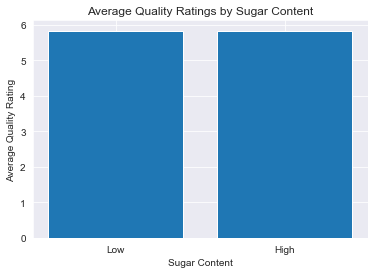

In [138]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

# Plotting Wine Type and Quality

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [139]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [140]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [145]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [146]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [147]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

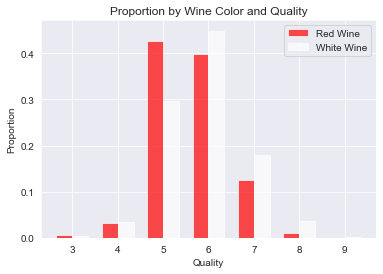

In [151]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();